# CS 452/552 Data Science with Python: Homework 3

Download data files from LMS. Code/Explain your solution over this `IPython` notebook at required cells, and complete locally.

To submit your assignment, in LMS, upload your solution to LMS as a single notebook with following file name format:

`lastName_firstName_CourseNumber_HW3.ipynb`

where `CourseNumber` is the course in which you're enrolled (CS 452 or CS 552).

Problems on homework assignments are equally weighted.

Any type of plagiarism will not be tolerated. Your submitted codes will be compared with other submissions and also the codes available on internet and violations will have a penalty of -100 points. (In case of copying from
another student both parties will get -100)

Import libraries

In [10]:
#Import libraries before starting
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

**All data sets can be found in the ``datasets`` folder and are in comma separated value (CSV) format**

## Problem 1: Image Classification

In this problem, your task is to classify images of handwritten digits. 

The data set is provided in the file `dataset_1.txt` and contains 8x8 gray-scale images of hand-written digits, flattened to a 64-length vector. The last column contains the digit. For simplicity, we have only included digits 0, 1 and 3. 

We want you to build a model that can be given the image of a hand-written digit and correctly classify this digit as 0, 1 or 3.

### Step 1: Read in the data and visualize

**Solution:**

In [53]:
df = pd.read_csv('datasets/dataset_1.txt', header=None, delimiter=',')

X = df.iloc[:, :-1].values  # The image data (64 features)
y = df.iloc[:, -1].values   # The label (digit)

In [54]:
X.shape, y.shape

((543, 64), (543,))

In [55]:
print(df.head()) 

    0    1     2     3     4     5    6    7    8    9   ...   55   56   57  \
0  0.0  0.0   5.0  13.0   9.0   1.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
1  0.0  0.0   1.0   9.0  15.0  11.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
2  0.0  0.0   3.0  13.0  11.0   7.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
3  0.0  0.0  10.0  14.0  11.0   3.0  0.0  0.0  0.0  4.0  ...  0.0  0.0  0.0   
4  0.0  0.0   6.0  14.0  10.0   2.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   

     58    59    60   61   62   63   64  
0   6.0  13.0  10.0  0.0  0.0  0.0  0.0  
1   1.0  10.0  13.0  3.0  0.0  0.0  0.0  
2   2.0  12.0  13.0  4.0  0.0  0.0  0.0  
3  11.0  16.0  12.0  3.0  0.0  0.0  0.0  
4   7.0  16.0  11.0  1.0  0.0  0.0  0.0  

[5 rows x 65 columns]


In [56]:
print(np.unique(y))

[0. 1. 3.]


In [57]:
import collections
print(collections.Counter(y))

Counter({np.float64(3.0): 183, np.float64(1.0): 182, np.float64(0.0): 178})


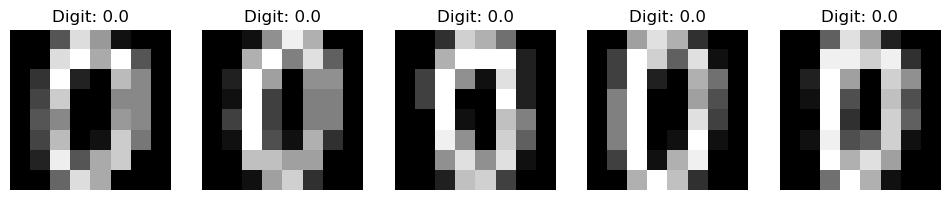

In [58]:
num_images = 5  # first 5 images
fig, axes = plt.subplots(1, num_images, figsize=(12, 3))

for i in range(num_images):
    axes[i].imshow(X[i].reshape(8, 8), cmap='gray')
    axes[i].set_title(f'Digit: {y[i]}')
    axes[i].axis('off')  

plt.show()

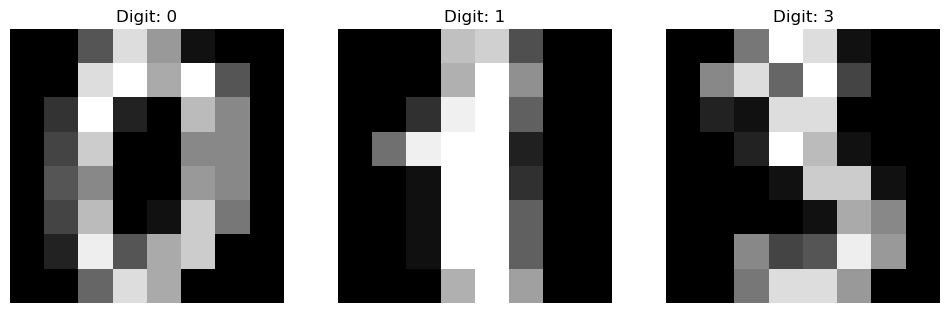

In [25]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(12, 4))

for i, label in enumerate([0, 1, 3]):
    index = np.where(y == label)[0][0] # index of the label in the dataset
    
    axes[i].imshow(X[index].reshape(8, 8), cmap='gray')
    axes[i].set_title(f'Digit: {label}')
    axes[i].axis('off') 

plt.show()

**Explain why PCA is a better choice for dimension reduction in this problem than step-wise variable selection**

* Because PCA is an unsupervised approach, effectively lowers dimensionality by capturing the most significant variations in the data, and performs well with high-dimensional data, such as images, it is preferable for dimension reduction in this case.
* Step-wise variable selection is more appropriate for choosing key features for a particular predictive model than for generic dimensionality reduction. It is model-dependent and can be computationally costly, particularly for large data sets.

### Part 1(a).  Reduce the data

Images data are typically high dimensional (the image vector has one feature for every pixel). Thus, to make working with image data more tractible, one might first apply a dimension reduction technique to the data.

- Explain why PCA is a better choice for dimension reduction in this problem than step-wise variable selection.


- Choose the smallest possible number of dimensions for PCA that still permits us to perform classification. 

  (**Hint:** how do we visually verify that subgroups in a dataset are easily classifiable?)


- Visualize and interpret the principal components. Interpret, also, the corresponding PCA varaiable values.

- Explain why PCA is a better choice for dimension reduction in this problem than step-wise variable selection.
    * One effective method for reducing the dimensionality of high-dimensional data, such as images, while preserving as much of the original variability as possible is Principal Component Analysis (PCA). Reducing the number of dimensions in the feature space (the number of pixels) is intended to speed up and simplify classification while preserving important information.

- Choose the smallest possible number of dimensions for PCA that still permits us to perform classification. 
    * We must examine how well the data points are segregated in lower dimensions in order to ascertain the minimum number of dimensions that still permits efficient classification. Visualizing the data following PCA and determining whether the classes (digits 0, 1, and 3) remain well-separated in the reduced dimensions will accomplish this.
    * One common method is to reduce the data to two or three dimensions by applying PCA.
    Plot the data in two or three dimensions to see if the points of the various classes (digits 0, 1, and 3) are equally distributed.
    The least number of dimensions in which the classes seem to be distinguished would be the bare minimum required. In 2D or 3D, can compress the data to that many dimensions if the classes can be separated visually.

Reduction to 2D

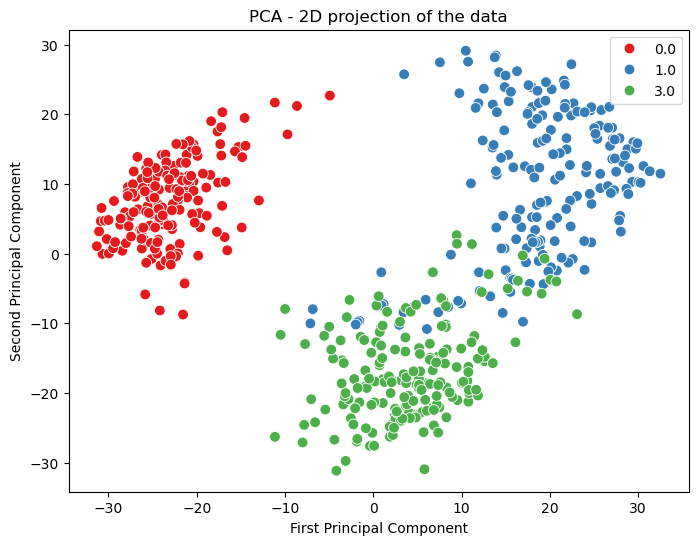

In [59]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns


# x-aixs and y-axis represent the first and second principal components
# PCA with 2 components
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

# 2D projection of the data
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_reduced[:, 0], y=X_reduced[:, 1], hue=y, palette="Set1", s=60)
plt.title('PCA - 2D projection of the data')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()

Shape of pca components: (2, 64)
Explained Variance Ratio for each component:
[0.29986304 0.18812471]


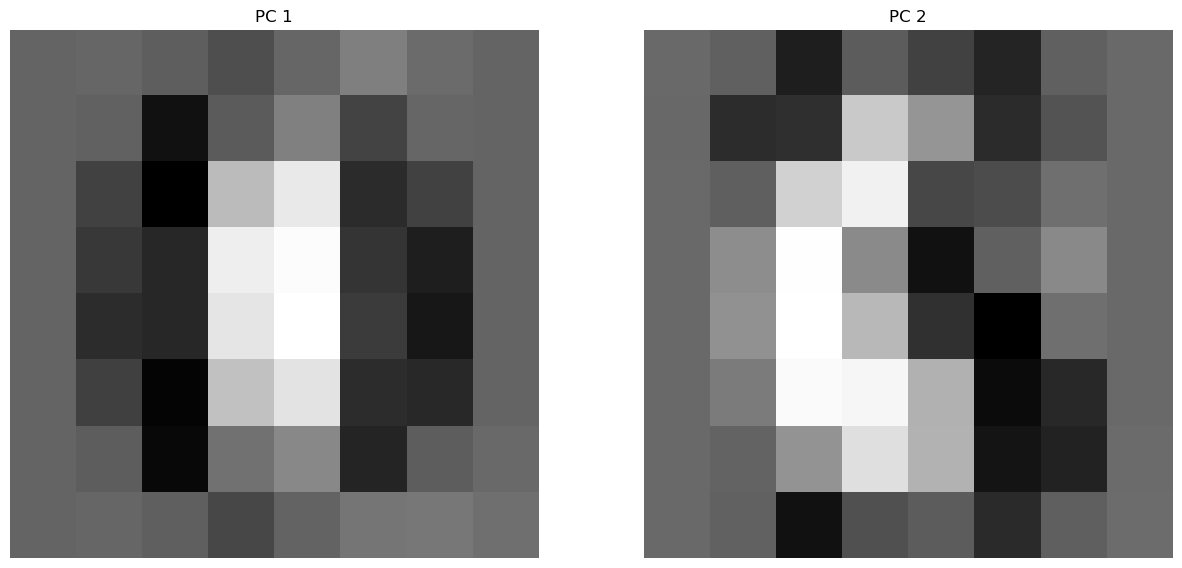

In [60]:
pca_components = pca.components_ # principal components as rows (8x8 --> flattened 64 dim vector)
print(f"Shape of pca components: {pca_components.shape}")
num_components_to_show = min(2, pca_components.shape[0])
plt.figure(figsize=(15, 8))
for i in range(num_components_to_show):
    plt.subplot(1, num_components_to_show, i + 1)
    plt.imshow(pca_components[i].reshape(8, 8), cmap='gray')
    plt.title(f'PC {i + 1}')
    plt.axis('off')
    
print("Explained Variance Ratio for each component:")
print(pca.explained_variance_ratio_)
plt.show()

Reduction to 3D

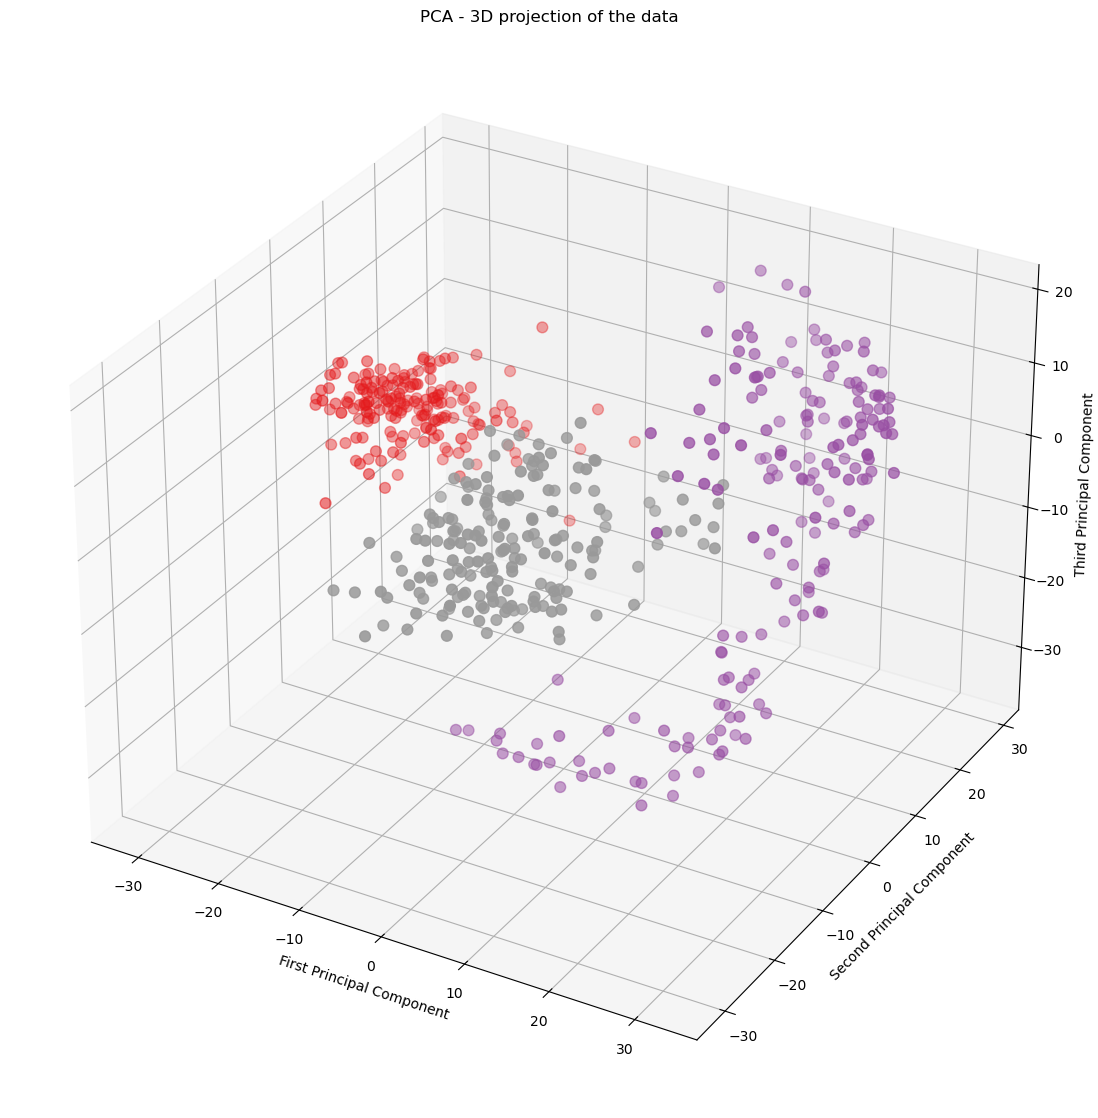

In [52]:
pca = PCA(n_components=3)
X_reduced_3d = pca.fit_transform(X)

# 3D projection 
fig = plt.figure(figsize=(16, 14))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(X_reduced_3d[:, 0], X_reduced_3d[:, 1], X_reduced_3d[:, 2], c=y, cmap="Set1", s=60)

ax.set_title('PCA - 3D projection of the data')
ax.set_xlabel('First Principal Component')
ax.set_ylabel('Second Principal Component')
ax.set_zlabel('Third Principal Component')

plt.show()

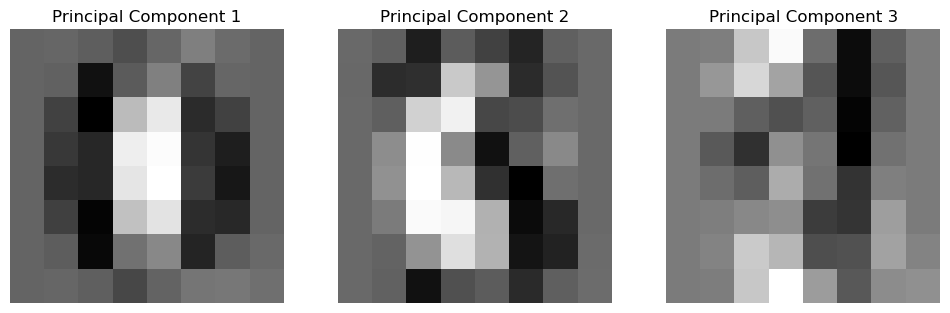

Explained Variance Ratio for each component:
[0.29986304 0.18812471 0.10705778]

Principal Components:
PC 1: [-5.59316347e-20  4.07378040e-03 -1.26328614e-02 -4.73018530e-02
  5.04679309e-03  5.70936269e-02  1.59955009e-02  9.28953452e-05
  4.18342707e-05 -3.65160758e-03 -1.77646581e-01 -1.87523760e-02
  5.92735029e-02 -6.93119066e-02  4.29300931e-03  1.31297923e-04
  2.09521567e-05 -7.49854014e-02 -2.14150613e-01  1.85132073e-01
  2.84989497e-01 -1.21432620e-01 -7.37837854e-02 -0.00000000e+00
  1.91031044e-05 -9.31258704e-02 -1.29738194e-01  2.95904287e-01
  3.25201527e-01 -1.01058954e-01 -1.49509252e-01 -0.00000000e+00
 -0.00000000e+00 -1.19989938e-01 -1.29398196e-01  2.75176629e-01
  3.32237146e-01 -8.74394968e-02 -1.64076339e-01 -0.00000000e+00
 -0.00000000e+00 -7.70153679e-02 -2.05281613e-01  1.98372561e-01
  2.73897899e-01 -1.18385044e-01 -1.24582328e-01 -0.00000000e+00
 -0.00000000e+00 -1.52120509e-02 -1.95338032e-01  3.04248050e-02
  7.73628775e-02 -1.35659564e-01 -1.56059422e-

In [ ]:
pca = PCA(n_components=3)
pca.fit(X)

components = pca.components_ # weights for each principal component

num_components = 3 
plt.figure(figsize=(12, 4))

for i in range(num_components):
    plt.subplot(1, num_components, i+1)
    component_image = components[i].reshape(8, 8) 
    plt.imshow(component_image, cmap='gray')
    plt.title(f'Principal Component {i+1}')
    plt.axis('off')

plt.show()

print("Explained Variance Ratio for each component:")
print(pca.explained_variance_ratio_) # how much variance each component explains --> higher variance by a component more info it carries

print("\nPrincipal Components:")
for i in range(num_components):
    print(f"PC {i+1}: {components[i]}")

Are these projections useful? That is do they reduce the data in a way that makes it possible for us to perform our task?

* Plotted projections seem both 2D an 3D reduction can separated the three classes but we need to look for numerical values to strict results but overall projections are useful to understand what are the components stands for in the dataset. 
* For 2D PCA reduction, PC1 explains 29.99% of the variance and PC2 explains 18.81% of the variance. Combining them, explain about 48.80% of the total variance.
* For the 3D PCA reduction, PC1 explains again 29.99% of the variance, PC2 explains 18.81% and PC3 explains 10.71%. Combining them, explain about 59.61% o the total variance.
* Based on the task, we need to choose trade-off between capturing enough variance and reducing dimensionality but overall PCA can be used for the digit dataset because we have only 3 classes in total and even 2 components can explain almost half of the variance

Let's now try reducing the number of dimensions in the data using PCA. Why is PCA a valid technique for dimension reduction? Why is PCA appropriate in the context of our task?

* PCA's ability to reduce dimensionality while maintaining variance through the transformation of correlated features into uncorrelated components makes it valid.
* By capturing the most crucial information while discarding less important features, PCA helps handle high-dimensional data, lowers noise, and frequently produces better, simpler models, making it suitable for image classification.

Are the PCA dimension reductions any good? What does a "good" dimension reduction mean in the context of our task? 

Can you interpret the components of the PCA in the context of our application? What is a component of the PCA (in terms of predictors) again?

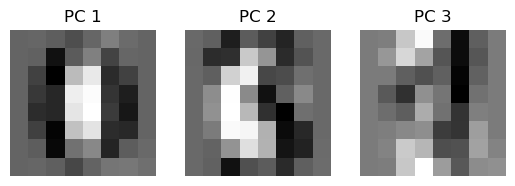

In [47]:
import matplotlib.pyplot as plt

num_components_to_show = 3
for i in range(num_components_to_show):
    plt.subplot(1, num_components_to_show, i + 1)
    plt.imshow(pca.components_[i].reshape(8, 8), cmap='gray')
    plt.title(f'PC {i + 1}')
    plt.axis('off')

plt.show()

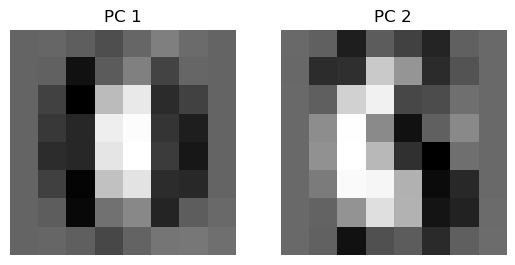

In [48]:
import matplotlib.pyplot as plt

num_components_to_show = 2
for i in range(num_components_to_show):
    plt.subplot(1, num_components_to_show, i + 1)
    plt.imshow(pca.components_[i].reshape(8, 8), cmap='gray')
    plt.title(f'PC {i + 1}')
    plt.axis('off')

plt.show()

* A weighted combination of the original image pixels that optimizes the variance in the data is a PCA component.
* Understanding the most important features that each component captures is made easier by interpreting the components. This could relate to different digit images' forms, orientations, or structural patterns which help in digit classification.
* For example, in the PC1 and PC2 components for 2D reduction for PCA we can see that component 1 has a darker shade at the left side while component 2 has a more s shaped curve so they can represent different orientations of the overall dataset.


### Part 1(b). Build a classifier

So far, we have only learned models that distinguishes between two classes. Develop and implement a **simple and naive** method of distinguishing between the three digits in our reduced dataset using binary classifiers. 

**Solution:**

In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=42)

# binary classifiers (one-vs-rest for each digit)
# three classifiers: one for each of 0, 1, and 3
classifiers = {
    0: LogisticRegression(),
    1: LogisticRegression(),
    3: LogisticRegression()
}

for digit in classifiers:
    y_train_binary = (y_train == digit).astype(int)
    classifiers[digit].fit(X_train, y_train_binary)

y_pred = []
for x in X_test:
    probs = [classifiers[digit].predict_proba([x])[0][1] for digit in classifiers] 
    predicted_class = max(zip(classifiers.keys(), probs), key=lambda x: x[1])[0]
    y_pred.append(predicted_class)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the binary classifier (one-vs-rest) on the test set: {accuracy:.4f}")

Accuracy of the binary classifier (one-vs-rest) on the test set: 0.9541


Is this accuracy meaningful? We've already seen cases where high R^2 values can be deeply misleading. Is an high accuracy rate mean we've learned a good classifier? Shouldn't there be a more intuitive way to assess the quality of our classifiers?

* A high accuracy rate of 0.9908 may seem outstanding at first, but accuracy by itself is not always a reliable indicator of the classifier's performance, particularly in tasks with non-uniform error consequences (e.g., different digits may be harder to classify than others) or imbalanced datasets.
* Accuracy = Correct Predictions / Total Predictions
* The classifier may constantly predict 0 and still get a high accuracy if the dataset contains a majority class (for example, 0 is far more common than 1 or 3).
* We should examine additional metrics that provide more information about how well the model is differentiating between the classes in order to evaluate the classifier's quality.

In [62]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, classification_report

precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

Precision: 0.9493589743589744
Recall: 0.9458689458689458
F1 Score: 0.9474564127059947


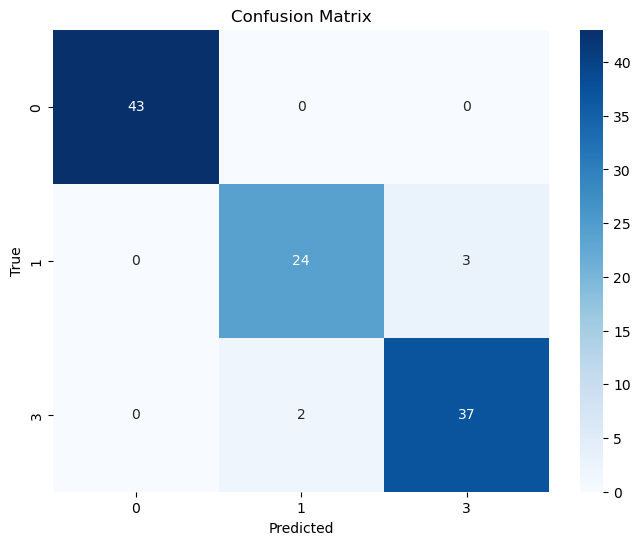

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1', '3'], yticklabels=['0', '1', '3'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [64]:
report = classification_report(y_test, y_pred)
print('Classification Report:')
print(report)

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        43
         1.0       0.92      0.89      0.91        27
         3.0       0.93      0.95      0.94        39

    accuracy                           0.95       109
   macro avg       0.95      0.95      0.95       109
weighted avg       0.95      0.95      0.95       109



### Part 1(c). Build a better one
Asses the quality of your classifier.


- What is the fit (in terms of accuracy or R^2) of your model on the reduced dataset? Visually assess the quality of your classifier by plotting decision surfaces along with the data. Why is visualization of the decision surfaces useful? What does this visualization tell you that a numberical score (like accuracy or R^2) cannot?


- What are the draw backs of your approach to multi-class classification? What aspects of your method is contributing to these draw backs, i.e. why does it fail when it does? 

  (**Hint:** make use your analysis in the above; think about what happens when we have to classify 10 classes, 100 classes)
 
 
- Describe a possibly better alternative for fitting a multi-class model. Specifically address why you expect the alternative model to outperform your model.

  (**Hint:** How does ``sklearn``'s Logistic regression module handle multiclass classification?).

**Solution:**

Since this is a classification problem, accuracy (as well as precision, recall, and F1) is what matters, and R2 is not the optimal metric (it is primarily used for regression). --> Accuracy of the binary classifier (one-vs-rest) on the test set: 0.9541

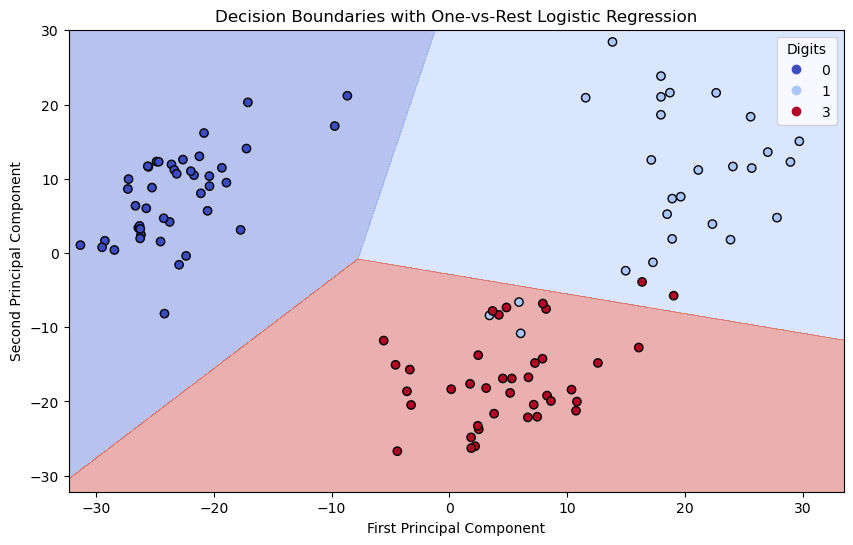

In [67]:
h = 0.05 
x_min, x_max = X_reduced[:, 0].min() - 1, X_reduced[:, 0].max() + 1
y_min, y_max = X_reduced[:, 1].min() - 1, X_reduced[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

grid = np.c_[xx.ravel(), yy.ravel()]

probs = np.zeros((grid.shape[0], len(classifiers)))
for idx, digit in enumerate(classifiers):
    probs[:, idx] = classifiers[digit].predict_proba(grid)[:, 1]

Z = np.argmax(probs, axis=1)
digits = list(classifiers.keys())
Z = np.array([digits[i] for i in Z])

Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.coolwarm)
scatter = plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=plt.cm.coolwarm, edgecolor='k')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('Decision Boundaries with One-vs-Rest Logistic Regression')
plt.legend(*scatter.legend_elements(), title="Digits")
plt.show()

Why visualization of decision boundary useful?
* It shows the classifier's areas of confidence and confusion.
* If the decision boundary is smooth and separates classes well, it indicates a good classifier. (vice versa is a bad classifier instead of getting only accuracy as a comparison)
* Plotting can show areas where classes overlap, making it difficult to tell them apart.

Drawbacks of the one vs rest model
* Each classifier may be trained on imbalanced data
* For the same point, two classifiers may both provide high probabilities
* When we have many classes, OvR becomes messy
* When two classes are similar, OvR finds it difficult to make the right decision
* OvR ignores the possibility of class similarities and examines each class separately (not model the competition between classes)

Propose a better model
* We can use directly multinomial logistic regression instead of one vs rest model. Multinomial logistic regression see all the classes and distribute the possibilities over each classes so there is a competition between number of classes then model assign the class with highest probability. (using softmax probability)
* Multinomial logistic regression takes into account every class collectively rather than individually.
* The most likely class is always predicted since it provides probabilities that add up to 1. (scales better for higher number of classes because of add up to 1)


## Problem 2. Sentiment Analysis

In this problem, you will explore how to predict the underlying emotional tone of textual data - this task is called sentiment analysis. 

You will be using the dataset in the file `dataset_2.txt`. In this dataset, there are 1382 posts containing textual opinions about Ford automobiles, along with labels indicating whether the opinion expressed is positive or negative. 

Given a new post about an automobile, your goal is to predict if the sentiment expressed in the new post is positive or negative. For this task, you should implement a *regularized* logistic regression model.

Produce a report summarizing your solution to this problem:

- Your report should address all decisions you made in the "Data Science Process":

   a. Data collection & cleaning
   
   b. Data exploration
   
   c. Modeling
   
   d. Analysis  
   
   e. Visualization and presentation  

## Functions (might be useful for the following calculations)

In [68]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import re
import matplotlib

def extract_attributes(data):
    # Encode labels and vectorization
    label_encoder = LabelEncoder()
    data['class_encoded'] = label_encoder.fit_transform(data['class'])  # 0 for Neg, 1 for Pos

    vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
    X = vectorizer.fit_transform(data['text'])
    y = data['class_encoded']

    return X, y

def extract_words(corpus):
    #A function to extract words from a corpus
    
    # Create array with all the sentences
    whole_text = " ".join(corpus)

    # Extract individual words
    words = re.findall(r'\w+', whole_text.lower())
    return words

def count_words(words, number_of_words):
    common_words = pd.DataFrame(Counter(words).most_common(number_of_words), columns=["word", "frequency"])
    return common_words

def plot_common_words(common_words):
    plt.figure(figsize=(18, 10))
    plt.bar(common_words.index, common_words['frequency'].values, color = "darkblue", alpha = 0.7, edgecolor="white")
    plt.xticks(common_words.index, common_words['word'].values, rotation=90)
    plt.title('Plot I: 100 most common words')
    plt.xlabel('Words'); plt.ylabel('Frequency')
    plt.grid()
    plt.show()

## 1: Importing Data and Data Exploration

**Solution:**

In [ ]:
data = pd.read_csv('datasets/dataset_2.txt') # read data

In [ ]:
print(data.head()) # get the first 5 rows for correctness

  class                                               text
0   Neg   In 1992 we bought a new Taurus and we really ...
1   Neg   The last business trip  I drove to San Franci...
2   Neg   My husband and I purchased a 1990 Ford F250 a...
3   Neg   I feel I have a thorough opinion of this truc...
4   Neg   AS a mother of 3  all of whom are still in ca...


In [ ]:
print("\nData Info:")
print(data.info()) # get the overall info for dataset


Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1382 entries, 0 to 1381
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   class   1382 non-null   object
 1   text    1382 non-null   object
dtypes: object(2)
memory usage: 21.7+ KB
None


In [ ]:
print("\nClass Distribution:")
print(data['class'].value_counts()) # look for class distribution for balance/unbalance labelling of overall data


Class Distribution:
class
Neg    691
Pos    691
Name: count, dtype: int64


/var/folders/wb/2d5zv5zx3sb06ttllws04nz80000gn/T/ipykernel_7430/2196200581.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='class', data=data, palette='Set2')


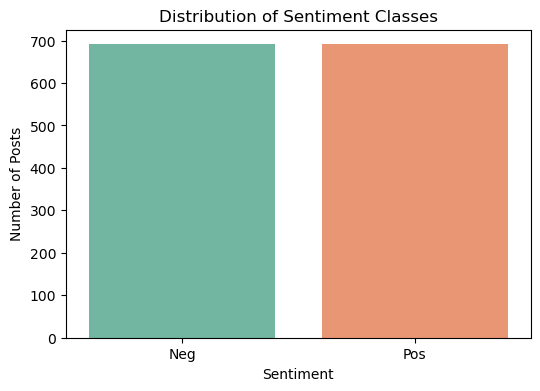

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# we have a balanced dataset with each class has the same number of samples
plt.figure(figsize=(6,4))
sns.countplot(x='class', data=data, palette='Set2')
plt.title('Distribution of Sentiment Classes')
plt.xlabel('Sentiment')
plt.ylabel('Number of Posts')
plt.show()

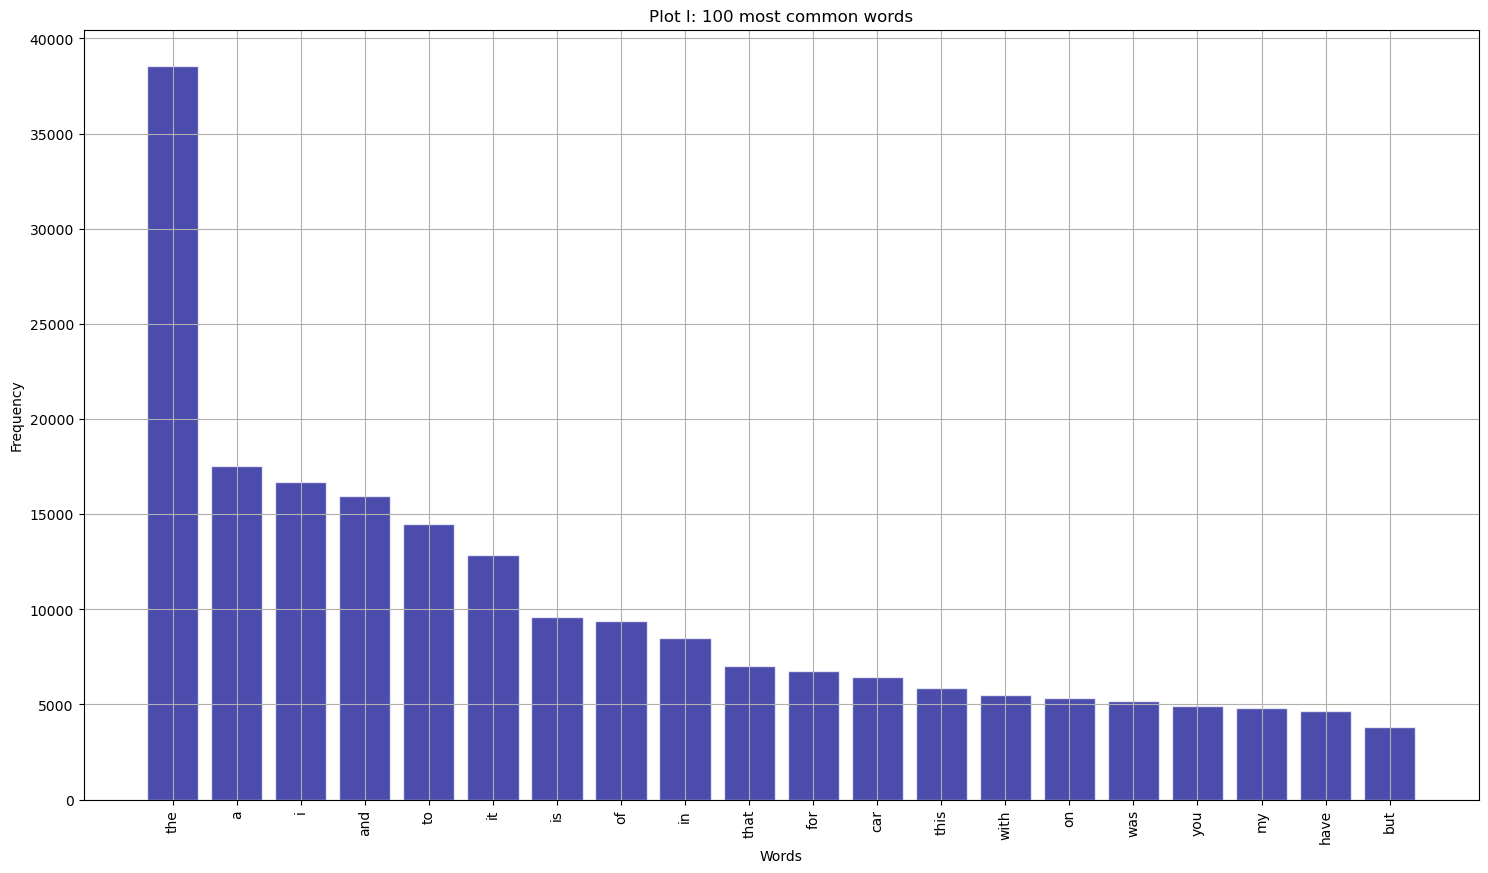

In [83]:
from collections import Counter
import re

# we can also count the common words for get an intution
words = extract_words(data['text'])

common_words = pd.DataFrame(Counter(words).most_common(20), columns=["word", "frequency"])
plot_common_words(common_words)

#plt.figure(figsize=(12,6))
#sns.barplot(x='word', y='frequency', data=common_words, palette='viridis')
#plt.title('Top 20 Most Common Words')
#plt.xticks(rotation=45)
#plt.show()

## 2: Cleaning the data

**Solution:**

In [85]:
import re
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower()  # lowercase
    text = re.sub(r'\d+', '', text)  # remove numbers
    text = re.sub(r'[^\w\s]', '', text)  # remove punctuation
    text = re.sub(r'\s+', ' ', text).strip()  # remove extra whitespace
    # remove stopwords
    text = " ".join([word for word in text.split() if word not in stop_words])
    return text

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/beyzakaya/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [86]:
data['clean_text'] = data['text'].apply(clean_text)
print(data[['text', 'clean_text']].head())

                                                text  \
0   In 1992 we bought a new Taurus and we really ...   
1   The last business trip  I drove to San Franci...   
2   My husband and I purchased a 1990 Ford F250 a...   
3   I feel I have a thorough opinion of this truc...   
4   AS a mother of 3  all of whom are still in ca...   

                                          clean_text  
0  bought new taurus really loved decided try new...  
1  last business trip drove san francisco went he...  
2  husband purchased ford f nothing problems owne...  
3  feel thorough opinion truck compared post eval...  
4  mother still carseats logical thing trade sx m...  


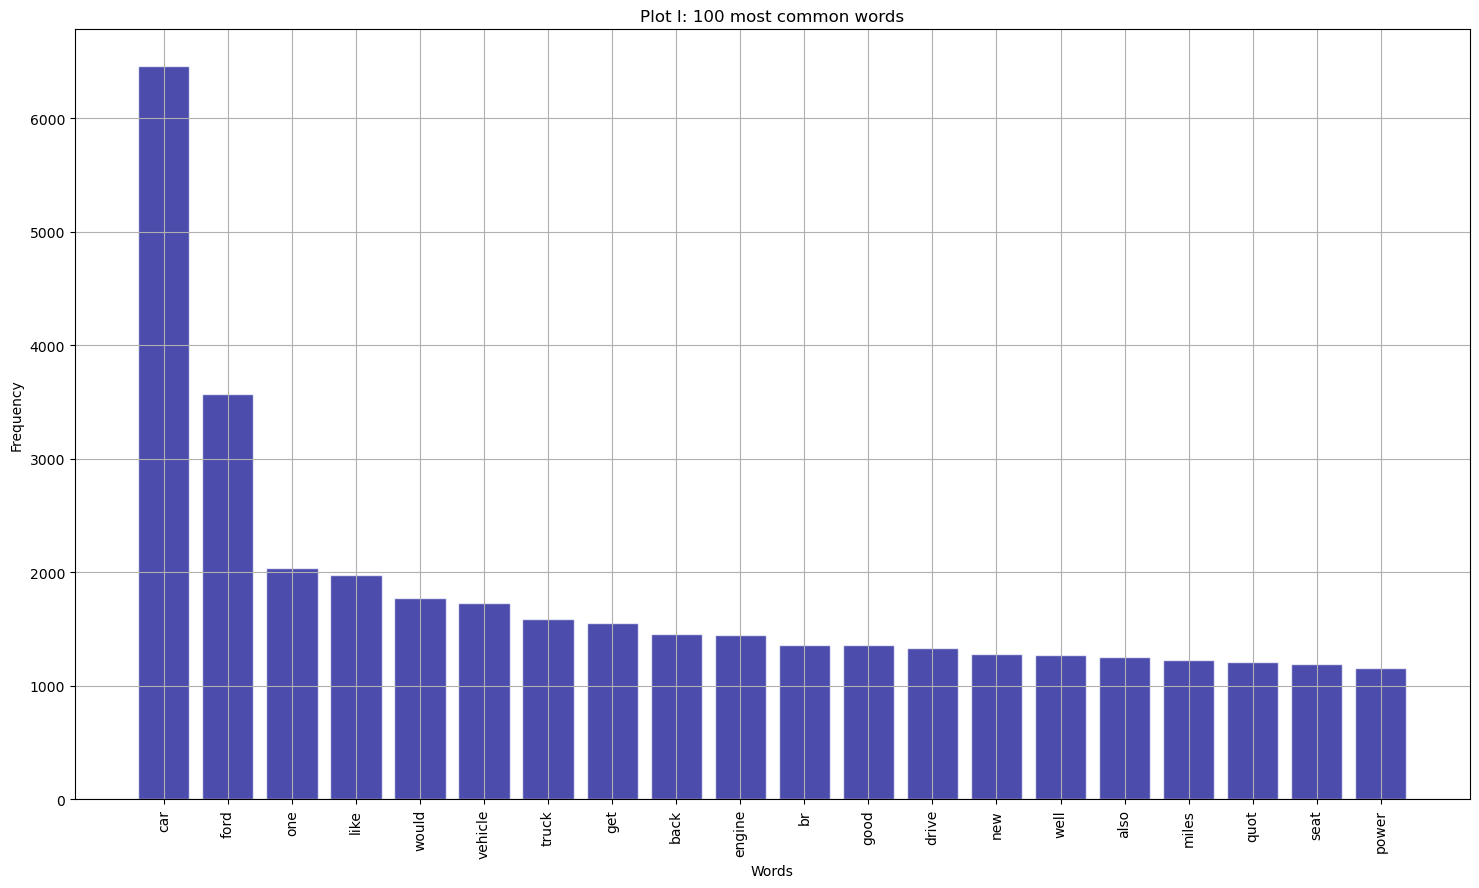

In [90]:
words = extract_words(data['clean_text'])

common_words_cleaned = pd.DataFrame(Counter(words).most_common(20), columns=["word", "frequency"])
plot_common_words(common_words_cleaned)


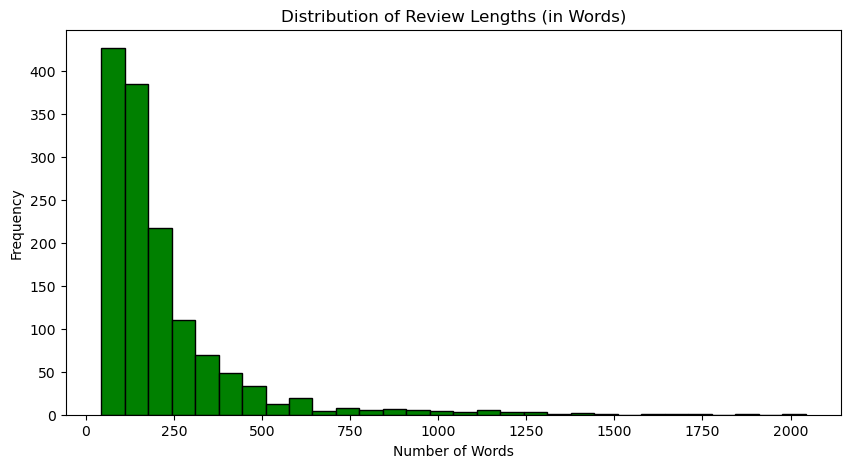

In [91]:
data['text_length'] = data['clean_text'].apply(lambda x: len(x.split()))

plt.figure(figsize=(10,5))
plt.hist(data['text_length'], bins=30, color='green', edgecolor='black')
plt.title('Distribution of Review Lengths (in Words)')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()

**Explanation:**

* With nltk, we can focus on to the important words with the same format of all dataset instead of different punctuations, lowercase issues, numbers or additional whitespaces
* After cleaning data, most common words are changed from the, a, i and, to etc. and instead there are more meaningful words

## 3:  Modelling

**Solution:**

In [93]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# features and labels
X, y = extract_attributes(data)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# model
model = LogisticRegression(penalty='l2', solver='liblinear')  # Regularized logistic regression
model.fit(X_train, y_train)

# evaluate
accuracy = model.score(X_test, y_test)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.8123


**Explanation:**

* In order to determine if a particular car review was positive or negative, we used a regularized logistic regression model for this sentiment analysis task. 
* Before fitting the model, we used the extract_attributes() function to prepare the data
* Due to its simplicity and effectiveness as a classifier for binary classification problems, logistic regression was selected for this task
* We used regularization with the L2 penalty, which is the default in logistic regression, to make sure our model did not overfit the data. 

## 4: Analysis

**Solution:**

In [94]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]  

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

precision = precision_score(y_test, y_pred)
print(f"Precision: {precision:.4f}")

recall = recall_score(y_test, y_pred)
print(f"Recall: {recall:.4f}")

f1 = f1_score(y_test, y_pred)
print(f"F1-score: {f1:.4f}")

Accuracy: 0.8123
Precision: 0.7862
Recall: 0.8444
F1-score: 0.8143


Confusion Matrix:
[[111  31]
 [ 21 114]]


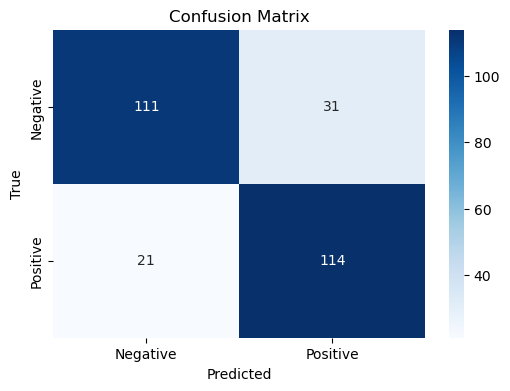

In [98]:
cm = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n{cm}")

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

AUC-ROC: 0.8833


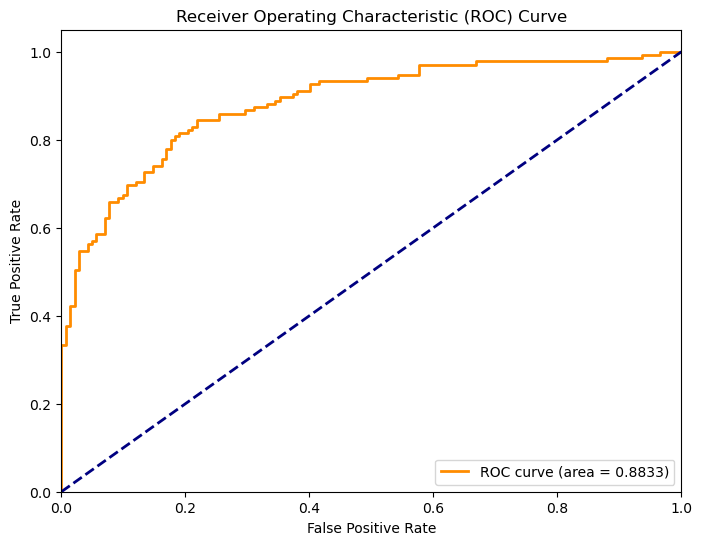

In [97]:
auc = roc_auc_score(y_test, y_prob)
print(f"AUC-ROC: {auc:.4f}")

fpr, tpr, thresholds = roc_curve(y_test, y_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Random classifier
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

**Explanation:**

* The model's overall solidity can be evaluated by its accuracy, which shows that roughly 81.23% of the predictions were accurate. But accuracy by itself can be misleading, particularly in datasets that are unbalanced (even if our dataset is very balanced it is good to go with more metrics), so other metrics were taken into account.
* Precision (0.7862) indicates that when the model predicted a positive sentiment, it was correct 78.62%. To prevent false positives, which could be damaging in applications like product reviews, a comparatively high precision is required.
* The model is good at identifying the majority of positive cases, as evidenced by its recall (0.8444), which shows that it correctly identified 84.44% of all true positive instances.
* The F1-score (0.8143) provides a more comprehensive assessment of model performance by striking a balance between precision and recall. In this case, the model appears to be performing reasonably well in terms of reducing false positives and false negatives, according to the F1-score.
* We can better comprehend the kinds of errors the model is making via to the confusion matrix. There are 114 true positives (positive sentiment that is correctly identified), 111 true negatives (negative sentiment that is correctly identified), 31 false positives (positive sentiment that is incorrectly classified), and 21 false negatives (negative sentiment that is incorrectly classified). The model appears to be better at correctly identifying positive sentiment than negative sentiment, as demonstrated by the relatively low number of false negatives.
* The model's high ability to discriminate between positive and negative sentiment is demonstrated by its AUC-ROC (0.8833). The model is generally effective in differentiating between positive and negative sentiments, as shown by its high level of separability between the classes (AUC of 0.8833).

## 5: Visualisation

**Solution:**

In [ ]:
def extract_attributes(data): # I used this function to extract vectorizer in here as an updated version
    # Encode labels and vectorization
    label_encoder = LabelEncoder()
    data['class_encoded'] = label_encoder.fit_transform(data['class'])  # 0 for Neg, 1 for Pos

    vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
    X = vectorizer.fit_transform(data['text'])
    y = data['class_encoded']

    return X, y, vectorizer

In [ ]:
X, y, vectorizer = extract_attributes(data)  # data and the vectorizer

In [101]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X, y)

LogisticRegression()

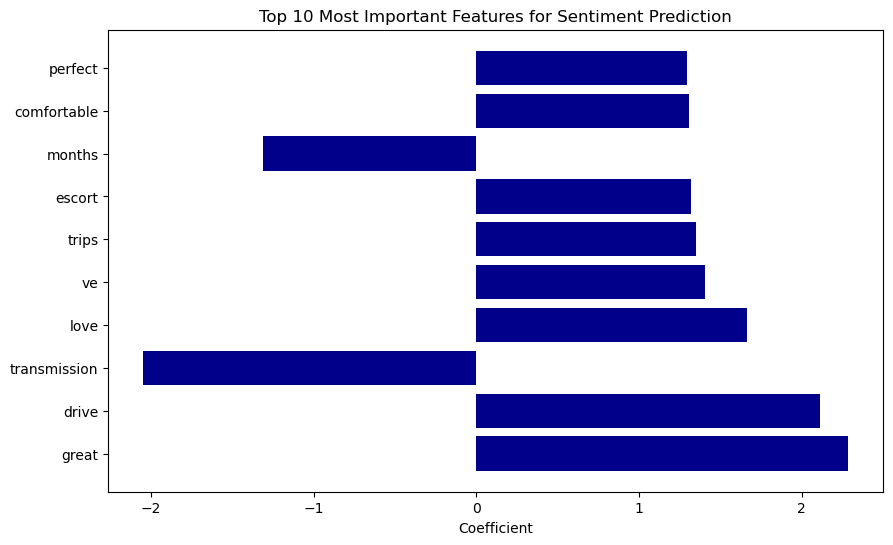

In [102]:
feature_names = vectorizer.get_feature_names_out()

coefficients = model.coef_[0]

feature_importance = pd.DataFrame({
    'feature': feature_names,
    'coefficient': coefficients
})

feature_importance['abs_coefficient'] = feature_importance['coefficient'].abs()
feature_importance = feature_importance.sort_values(by='abs_coefficient', ascending=False)

top_n = 10
plt.figure(figsize=(10, 6))
plt.barh(feature_importance.head(top_n)['feature'], feature_importance.head(top_n)['coefficient'], color='darkblue')
plt.xlabel('Coefficient')
plt.title('Top 10 Most Important Features for Sentiment Prediction')
plt.show()


**Explanation:**

* The positive sentiment class is linked to words with positive coefficients. The higher the coefficient, strongly the word contributes to predicting a positive sentiment.
* The negative sentiment class is linked to words with negative coefficients. A word's ability to predict negative sentiment increases with its coefficient's negative value.

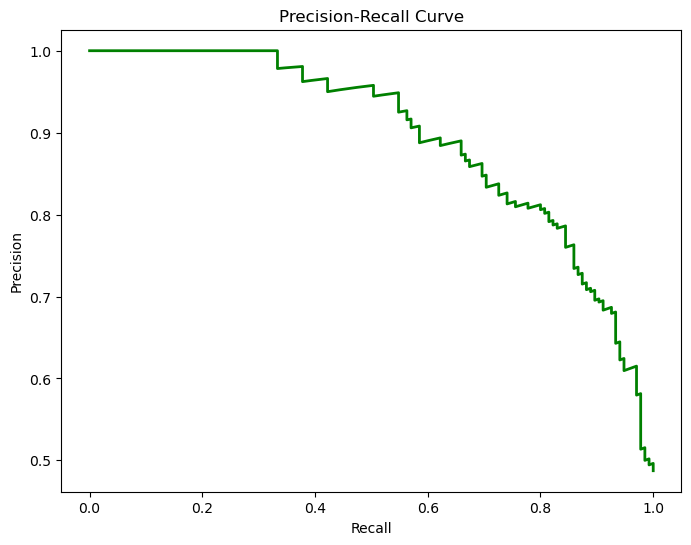

In [103]:
from sklearn.metrics import precision_recall_curve

precision, recall, _ = precision_recall_curve(y_test, y_prob)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='green', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

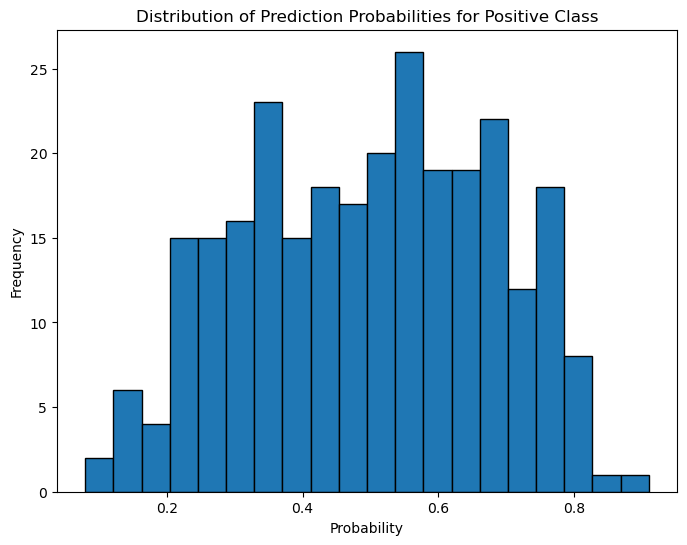

In [ ]:
# distribution of the predicted probabilities for the positive class 
plt.figure(figsize=(8, 6))
plt.hist(y_prob, bins=20, edgecolor='black')
plt.title('Distribution of Prediction Probabilities for Positive Class')
plt.xlabel('Probability')
plt.ylabel('Frequency')
plt.show()

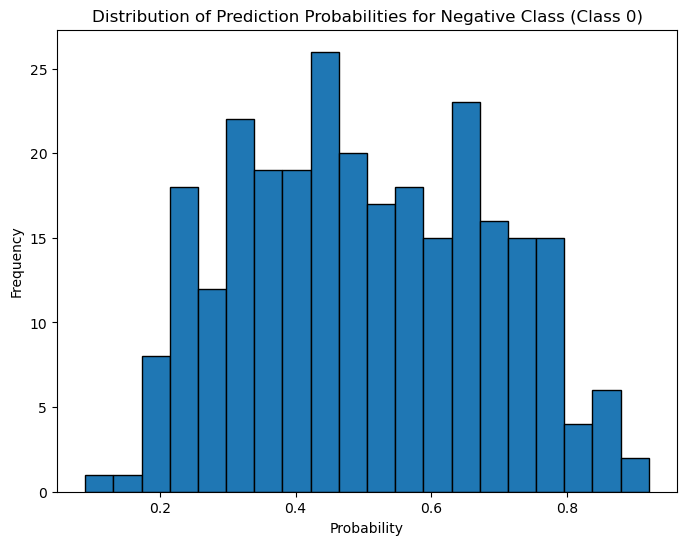

In [109]:
y_pred_prob_neg = 1 - y_prob

plt.figure(figsize=(8, 6))
plt.hist(y_pred_prob_neg, bins=20, edgecolor='black')
plt.title('Distribution of Prediction Probabilities for Negative Class (Class 0)')
plt.xlabel('Probability')
plt.ylabel('Frequency')
plt.show()

In [114]:
test_texts = data.iloc[y_test.index]['text']  

num_instances = 10
for i in range(min(num_instances, len(test_texts))):
    print(f"Instance {i + 1}")
    print(f"Text: {test_texts.iloc[i]}")
    print(f"Predicted Label: {'Positive' if y_pred[i] == 1 else 'Negative'}")
    print(f"True Label: {'Positive' if y_test.iloc[i] == 1 else 'Negative'}")
    print("-" * 50)


Instance 1
Text:  That 2001 Ford Explorer you may be considering is not as new as you think  Sure  it smells new  it s shiny  and it looks modern  but the mechanicals underneath are anything but new The explorer started out life in 1990  It was at the time  a break through  It handled nicely for a truck  had lots of room for people  pets  and cargo  and did everything well  The public reacted by making it the best selling sport utility vehicle in the country  and ever since  it has held that title  I can see the practical reasons why Americans hold this SUV so dear after a number of hours behind the wheel of my company s jet black 2001 Explorer 4x4 4 door XLS The explorer does everything well for 90  of American drivers  The afformentioned room  reliability  towing ability  and resale value have made it a hit here But I am one of those 10  of Americans who would find the Explorer lacking  Compared to new SUV s  the explorer feels every bit of 10 years old  Don t get me wrong  I owned a

## 6: Conclusion

**Solution:**

**Explanation:**

For sentiment analysis, the logistic regression model is a good place to start, particularly if we have limited computing power. It produces findings that are easy to understand and can successfully classify sentiment with the correct regularization and preprocessing. However, we might wish to investigate more advanced techniques or ensemble methods for higher results in a more complicated tasks then we need to use complexer models.